![python logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


# Exploratory Data Analysis with Python

## Objectives
Explore features or charecteristics of the data set

## Table of Contents


1. Import Data
2. Analyzing Individual Feature Patterns using Visualization
3. Descriptive Statistical Analysis
4. Basics of Grouping
5. Correlation and Causation




### 1. Import Data 

Setup

#### Import libraries:

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6)

pd.options.mode.chained_assignment = None



###### Import Data 
Here is the link for the Project Dataset

[Movies Data set](https://www.kaggle.com/datasets/danielgrijalvas/movies)

In [85]:
df=pd.read_csv('movies-Kaggle.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [88]:
# Summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [87]:
#see if we have any missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [91]:
# drop missing values
df.dropna(inplace =True)

In [94]:
# Drop duplicate values
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [109]:
# change the data type of Revenue and Budget to int
df['gross']=df['gross'].astype('int64')
df['budget']=df['budget'].astype('int64')

### 2. Analyzing Individual Feature Patterns Using Visualization

In [95]:
# list the data types for each column
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [98]:
# sort revenue
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [96]:
#calculate the correlation between variables of type "int64" or "float64" using the method "corr"
df.corr()

C:\Users\Thanuja\AppData\Local\Temp\ipykernel_6756\3161649763.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [97]:
#Find the correlation between the following columns
df[['score','votes','budget','gross','runtime']].corr()

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


##### Positive Linear Relationship

use "regplot" which plots the scatterplot plus the fitted regression line for the data. 

(0.0, 2995421805.3464203)

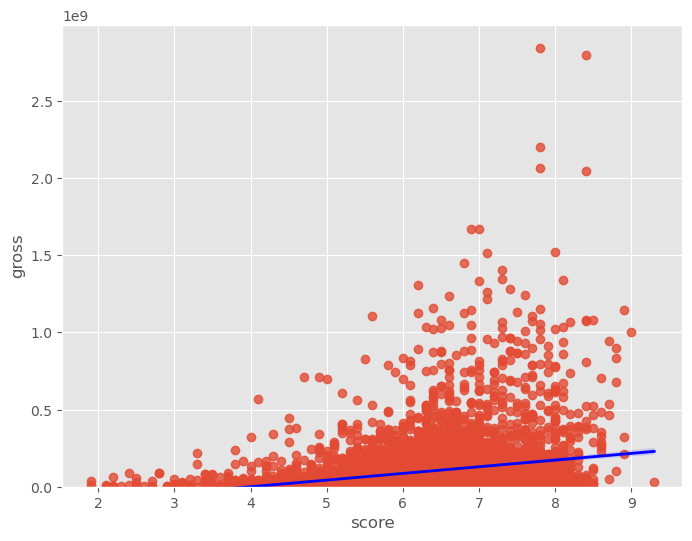

In [100]:
# score as potential predictor variable of revenue
sns.regplot(x="score", y="gross",line_kws={'color': 'blue', 'linewidth': 2}, data=df)
plt.ylim(0,)

(0.0, 2992023455.9694996)

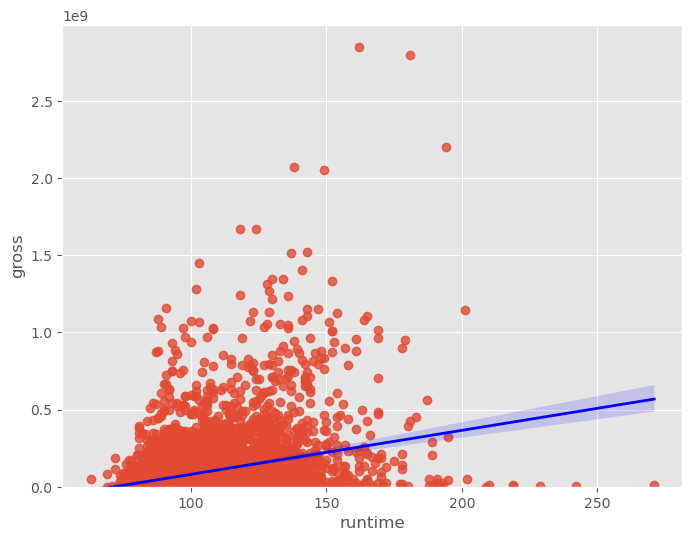

In [101]:
# runtime as potential predictor variable of revenue
sns.regplot(x="runtime", y="gross", line_kws={'color': 'blue', 'linewidth': 2},data=df)
plt.ylim(0,)

(0.0, 2989608497.7)

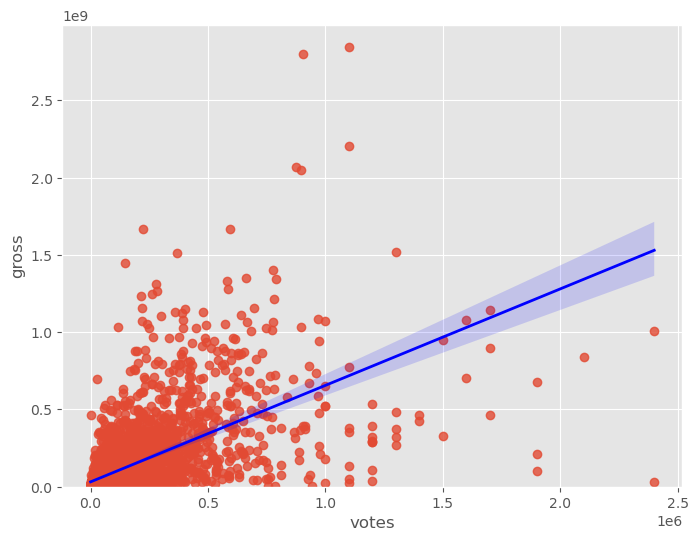

In [102]:
# votes as potential predictor variable of revenue
sns.regplot(x="votes", y="gross", line_kws={'color': 'blue', 'linewidth': 2},data=df)
plt.ylim(0,)

#### Categorical Variables

A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='rating', ylabel='gross'>

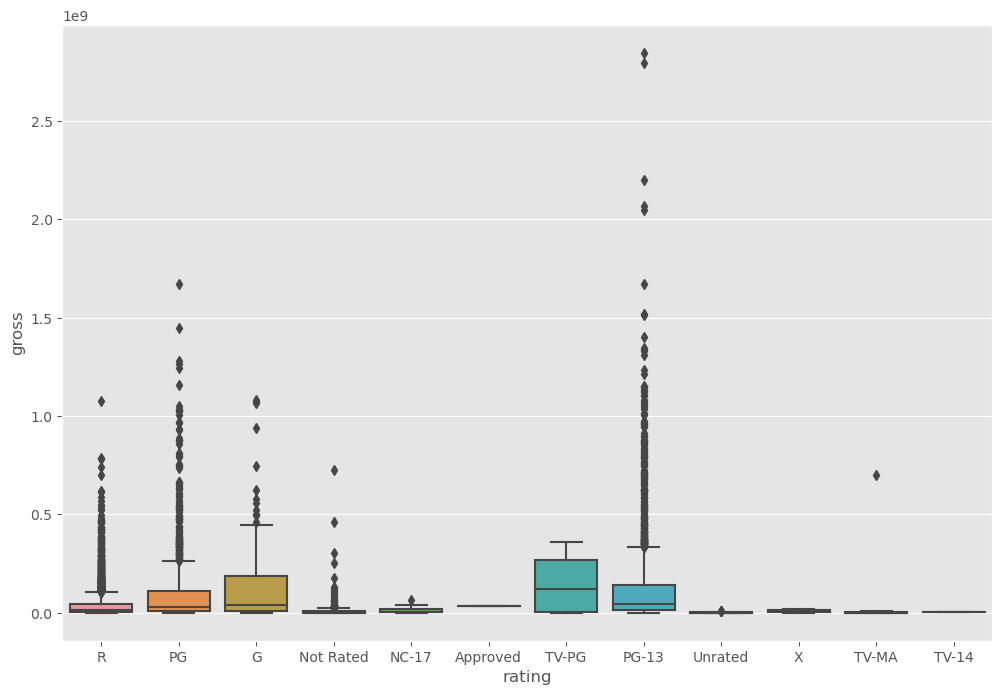

In [41]:
sns.boxplot(x="rating", y="gross", data=df)

In [103]:
# Order first fifteen companies by thier revenue
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [110]:
# Order fgenreby thier revenue
CompanyGrossSum = df.groupby(['genre'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','genre'], ascending = False)
CompanyGrossSumSorted


,gross
genre,
Action,237752868767
Comedy,88514817620
Animation,77865909110
Drama,52098564769
Adventure,43578711908
Crime,20017662162
Biography,19093930296
Horror,14261055032
Family,2074332587


### 3. Descriptive Statistical Analysis

In [ ]:
#computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.
df.describe()

In [ ]:
#We can apply the method "describe" on the variables of type 'object' as follows:
df.describe(include=['object'])

###### Value Counts

In [37]:
genre_Count=df['genre'].value_counts().to_frame()
genre_Count.rename(columns={'genre': 'value_counts'}, inplace=True)
genre_Count

,value_counts
Comedy,2245
Action,1705
Drama,1518
Crime,551
Biography,443
Adventure,427
Animation,338
Horror,322
Fantasy,44
Mystery,20


### 4. Basics of Grouping

In [48]:
#select the columns 'rating', 'genre' and 'gross', then assign it to the variable "df_group_one".
df_group_one = df[['rating','genre','gross']]

In [49]:
df_group_one = df_group_one.groupby(['rating'],as_index=False).mean()
df_group_one

C:\Users\Thanuja\AppData\Local\Temp\ipykernel_6756\4044894891.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['rating'],as_index=False).mean()


,rating,gross
0,Approved,3.656528e+07
1,G,1.420433e+08
2,NC-17,1.076324e+07
3,Not Rated,1.779590e+07
4,PG,1.064415e+08
5,PG-13,1.308771e+08
6,R,4.266882e+07
7,TV-14,5.756185e+06
8,TV-MA,7.917078e+07
9,TV-PG,1.503531e+08


In [51]:
df_group_three = df[['rating','genre','gross']]
df_group_two = df_group_three.groupby(['rating','genre'],as_index=False).mean()
df_group_two

,rating,genre,gross
0,Approved,Adventure,3.656528e+07
1,G,Action,3.432739e+07
2,G,Adventure,5.623710e+07
3,G,Animation,1.858594e+08
4,G,Biography,6.416569e+06
...,...,...,...
81,Unrated,Crime,1.653047e+06
82,Unrated,Drama,1.729008e+06
83,X,Crime,7.724701e+06
84,X,Drama,5.469040e+05


In [56]:
grouped_pivot = df_group_two.pivot(index='genre',columns='rating').fillna(0)
grouped_pivot

gross                                                          \
rating       Approved             G         NC-17     Not Rated            PG   
genre                                                                           
Action            0.0  3.432739e+07  0.000000e+00  5.654934e+07  1.059015e+08   
Adventure  36565280.0  5.623710e+07  0.000000e+00  2.760398e+07  1.156269e+08   
Animation         0.0  1.858594e+08  0.000000e+00  9.662719e+07  3.143682e+08   
Biography         0.0  6.416569e+06  2.347245e+07  9.998805e+06  4.668959e+07   
Comedy            0.0  1.001722e+08  1.702544e+06  7.637341e+06  4.555167e+07   
Crime             0.0  0.000000e+00  1.500800e+07  6.249100e+06  9.749639e+06   
Drama             0.0  1.635879e+07  1.209224e+07  5.076320e+06  3.697668e+07   
Family            0.0  5.526314e+06  0.000000e+00  0.000000e+00  3.058996e+08   
Fantasy           0.0  0.000000e+00  0.000000e+00  1.957475e+05  1.367703e+07   
Horror            0.0  0.000000e+00  2.956630e+06  1.759841e+06  2.221465e+07   
Music             0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Musical           0.0  0.000000e+00  0.000000e+00  2.217255e+06  0.000000e+00   
Mystery           0.0  0.000000e+00  0.000000e+00  4.592340e+05  0.000000e+00   
Romance           0.0  0.000000e+00  0.000000e+00  6.465320e+05  1.140285e+07   
Sci-Fi            0.0  0.000000e+00  0.000000e+00  2.244000e+04  1.021946e+07   
Sport             0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Thriller          0.0  0.000000e+00  0.000000e+00  0.000000e+00  9.032747e+05   
Western           0.0  0.000000e+00  0.000000e+00  0.000000e+00  1.736123e+06   

                                                                             \
rating            PG-13             R      TV-14         TV-MA        TV-PG   
genre                                                                         
Action     2.690363e+08  6.598825e+07  5756185.0  6.999925e+08          0.0   
Adventure  1.893946e+08  4.035390e+07        0.0  3.322479e+06          0.0   
Animation  7.623918e+07  2.164674e+07        0.0  2.765765e+05  299421632.0   
Biography  6.631110e+07  4.000156e+07        0.0  7.048080e+05          0.0   
Comedy     6.000610e+07  3.389005e+07        0.0  2.583000e+03          0.0   
Crime      8.604855e+07  3.871168e+07        0.0  0.000000e+00          0.0   
Drama      6.793782e+07  3.148062e+07        0.0  2.653835e+06    1284572.5   
Family     0.000000e+00  0.000000e+00        0.0  0.000000e+00          0.0   
Fantasy    7.117262e+07  3.452107e+07        0.0  0.000000e+00          0.0   
Horror     7.464866e+07  4.563195e+07        0.0  0.000000e+00          0.0   
Music      0.000000e+00  1.100140e+05        0.0  0.000000e+00          0.0   
Musical    0.000000e+00  0.000000e+00        0.0  0.000000e+00          0.0   
Mystery    2.586938e+08  6.589575e+07        0.0  0.000000e+00          0.0   
Romance    6.683418e+07  9.935781e+06        0.0  0.000000e+00          0.0   
Sci-Fi     6.864000e+07  1.477598e+07        0.0  0.000000e+00          0.0   
Sport      1.067629e+06  0.000000e+00        0.0  0.000000e+00          0.0   
Thriller   6.239359e+07  2.222209e+07        0.0  0.000000e+00          0.0   
Western    0.000000e+00  1.514488e+07        0.0  0.000000e+00          0.0   

                                     
rating          Unrated           X  
genre                                
Action     0.000000e+00         0.0  
Adventure  0.000000e+00         0.0  
Animation  0.000000e+00         0.0  
Biography  4.176085e+05         0.0  
Comedy     1.535445e+06         0.0  
Crime      1.653047e+06   7724701.0  
Drama      1.729008e+06    546904.0  
Family     0.000000e+00         0.0  
Fantasy    0.000000e+00         0.0  
Horror     0.000000e+00  17186348.0  
Music      0.000000e+00         0.0  
Musical    0.000000e+00         0.0  
Mystery    0.000000e+00         0.0  
Romance    0.000000e+00         0.0  
Sci-Fi  

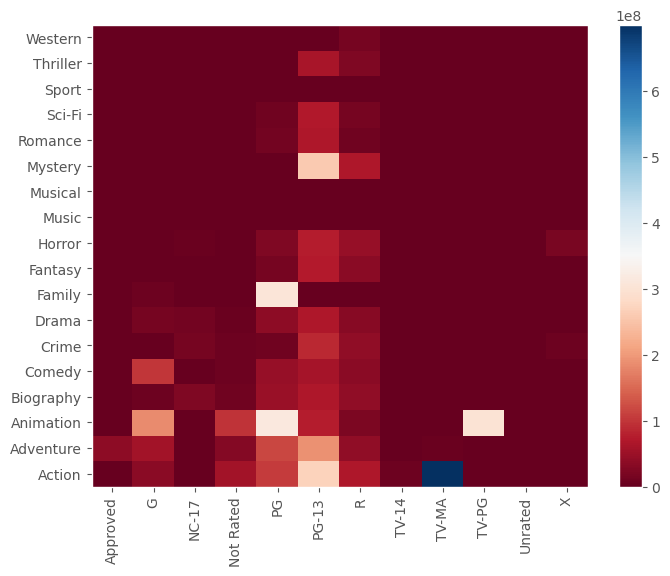

In [58]:
#use the grouped results
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 5. Correlation and Causation

##### Pearson Correlation

P-value

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

We can obtain this information using "stats" module in the "scipy" library.

In [74]:
#df['budget'].fillna(0)
#df['budget'].isnull().sum()
df['budget'].value_counts()

20000000.0    233
30000000.0    229
25000000.0    211
10000000.0    208
15000000.0    204
             ... 
34200000.0      1
30000.0         1
29750000.0      1
5250000.0       1
58750.0         1
Name: budget, Length: 413, dtype: int64

In [60]:
from scipy import stats

In [78]:
#calculate the Pearson Correlation Coefficient and P-value of 'runtime' and 'gross'.
pearson_coef, p_value = stats.pearsonr(df['runtime'], df['gross'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.27579600486744943  with a P-value of P =  3.16826415135914e-95


In [79]:
#calculate the Pearson Correlation Coefficient and P-value of 'budget' and 'gross'.
pearson_coef, p_value = stats.pearsonr(df['budget'], df['gross'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.740246543921963  with a P-value of P =  0.0


In [81]:
#calculate the Pearson Correlation Coefficient and P-value of 'score' and 'gross'.
pearson_coef, p_value = stats.pearsonr(df['score'], df['gross'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.22255631909246937  with a P-value of P =  8.10028106993564e-62


In [82]:
#calculate the Pearson Correlation Coefficient and P-value of 'score' and 'gross'.
pearson_coef, p_value = stats.pearsonr(df['votes'], df['gross'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.6147512368504805  with a P-value of P =  0.0
